In [1]:
import sys

sys.path.append('D:\\software_git_repos\\Polaris\\polaris_software\\utils_meinhold')
sys.path.append('D:\\software_git_repos\\Polaris\\polaris_software\\utils_zonca')
sys.path.append('../../cofe-python-analysis-tools/utils_zonca/pointing')
sys.path.append('../')
sys.path.append('../telescope_control')
sys.path.append('../VtoT')
from glob import glob
import time
import cofe_util as cu
import Tkinter,tkFileDialog
from demod import datparsing
%pylab

C:\Users\labuser\anaconda3\envs\py27\lib\site-packages\pyfits\__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
#%matplotlib auto

In [7]:
import realtime_gp as rt

In [8]:
root = Tkinter.Tk()

In [9]:
h2_files = list(tkFileDialog.askopenfilenames(initialdir='C://Greenland/test_data_from_greenpol_1//data',parent=root,title='Choose a file'))

In [10]:
h2_cal_files = list(tkFileDialog.askopenfilenames(initialdir='C://Greenland/test_data_from_greenpol_1//data',parent=root,title='Choose a file'))

In [11]:
h1_cal_files = list(tkFileDialog.askopenfilenames(initialdir='C://Greenland/test_data_from_greenpol_1//data',parent=root,title='Choose a file'))

In [12]:
h3_files = list(tkFileDialog.askopenfilenames(initialdir='C://Greenland/test_data_from_greenpol_1//data',parent=root,title='Choose a file'))

In [13]:
def vary_phase(chan='ch4',file_list=h2_files):
#loop over a full range of phase offsets to determine maximum polarization (Q) signal
#For horn 2 us ch4 =H2 Hi AC. We find maximum Q signal, even though test had maximum negative Q
#because the Temperature calibration will change the sign of the data
    qvsphase={}
    phases=[]
    qmeans=[]
    umeans=[]
    figure()
    for phase_offset in arange(0,65):    
        print(phase_offset)
        phases.append(phase_offset)
        j=rt.get_demodulated_data_from_list(filelist=file_list,phase_offset=phase_offset)
        qmeans.append(np.mean(j[chan]['Q']))
        umeans.append(np.mean(j[chan]['U']))
        plot(j[chan]['Q'],label='Q '+ str(phase_offset))
    legend()
    title('Q,U vs phase offset for ' + rt.chantoname(chan))
    qvsphase['phases']=phases
    qvsphase['qmeans']=qmeans
    qvsphase['umeans']=umeans
    figure()
    plot(qvsphase['phases'],qvsphase['qmeans'],label='Q ' + rt.chantoname(chan))
    plot(qvsphase['phases'],qvsphase['umeans'],label='U ' + rt.chantoname(chan))
    title('Q,U (volts) vs phase for -Q signal 2-5-2018')
    xlabel('Phase offset, [encoder counts]')
    ylabel('Q (U) [Volts]')
    legend()
    grid()
    return qvsphase

0


1001
16


1000
16


1000
16
1


1001
16


1000
16


1000
16
2


1001
16


1000
16


1000
16
3


1001
16


1000
16


1000
16
4


1001
16


1000
16


1000
16
5


1001
16


1000
16


1000
16
6


1001
16


1000
16


1000
16
7


1001
16


1000
16


1000
16
8


1001
16


1000
16


1000
16
9


1001
16


1000
16


1000
16
10


1001
16


1000
16


1000
16
11


1001
16


1000
16


1000
16
12


1001
16


1000
16


1000
16
13


1001
16


1000
16


1000
16
14


1001
16


1000
16


1000
16
15


1001
16


1000
16


1000
16
16


1001
16


1000
16


1000
16
17


1001
16


1000
16


1000
16
18


1001
16


1000
16


1000
16
19


1001
16


1000
16


1000
16
20


1001
16


1000
16


1000
16
21


1001
16


1000
16


1000
16
22


1001
16


1000
16


1000
16
23


1001
16


1000
16


1000
16
24


1001
16


1000
16


1000
16
25


1001
16


1000
16


1000
16
26


1001
16


1000
16


1000
16
27


1001
16


1000
16


1000
16
28


1001
16


1000
16


1000
16
29


1001
16


1000
16


1000
16
30


1001
16


1000
16


1000
16
31


1001
16


1000
16


1000
16
32


1001
16


1000
16


1000
16
33


1001
16


1000
16


1000
16
34


1001
16


1000
16


1000
16
35


1001
16


1000
16


1000
16
36


1001
16


1000
16


1000
16
37


1001
16


1000
16


1000
16
38


1001
16


1000
16


1000
16
39


1001
16


1000
16


1000
16
40


1001
16


1000
16


1000
16
41


1001
16


1000
16


1000
16
42


1001
16


1000
16


1000
16
43


1001
16


1000
16


1000
16
44


1001
16


1000
16


1000
16
45


1001
16


1000
16


1000
16
46


1001
16


1000
16


1000
16
47


1001
16


1000
16


1000
16
48


1001
16


1000
16


1000
16
49


1001
16


1000
16


1000
16
50


1001
16


1000
16


1000
16
51


1001
16


1000
16


1000
16
52


1001
16


1000
16


1000
16
53


1001
16


1000
16


1000
16
54


1001
16


1000
16


1000
16
55


1001
16


1000
16


1000
16
56


1001
16


1000
16


1000
16
57


1001
16


1000
16


1000
16
58


1001
16


1000
16


1000
16
59


1001
16


1000
16


1000
16
60


1001
16


1000
16


1000
16
61


1001
16


1000
16


1000
16
62


1001
16


1000
16


1000
16
63


1001
16


1000
16


1000
16
64


1001
16


1000
16


1000
16
0


1001
16


1000
16


1000
16


1000
16
1


1001
16


1000
16


1000
16


1000
16
2


1001
16


1000
16


1000
16


1000
16
3


1001
16


1000
16


1000
16


1000
16
4


1001
16


1000
16


1000
16


1000
16
5


1001
16


1000
16


1000
16


1000
16
6


1001
16


1000
16


1000
16


1000
16
7


1001
16


1000
16


1000
16


1000
16
8


1001
16


1000
16


1000
16


1000
16
9


1001
16


1000
16


1000
16


1000
16
10


1001
16


1000
16


1000
16


1000
16
11


1001
16


1000
16


1000
16


1000
16
12


1001
16


1000
16


1000
16


1000
16
13


1001
16


1000
16


1000
16


1000
16
14


1001
16


1000
16


1000
16


1000
16
15


1001
16


1000
16


1000
16


1000
16
16


1001
16


1000
16


1000
16


1000
16
17


1001
16


1000
16


1000
16


1000
16
18


1001
16


1000
16


1000
16


1000
16
19


1001
16


1000
16


1000
16


1000
16
20


1001
16


1000
16


1000
16


1000
16
21


1001
16


1000
16


1000
16


1000
16
22


1001
16


1000
16


1000
16


1000
16
23


1001
16


1000
16


1000
16


1000
16
24


1001
16


1000
16


1000
16


1000
16
25


1001
16


1000
16


1000
16


1000
16
26


1001
16


1000
16


1000
16


1000
16
27


1001
16


1000
16


1000
16


1000
16
28


1001
16


1000
16


1000
16


1000
16
29


1001
16


1000
16


1000
16


1000
16
30


1001
16


1000
16


1000
16


1000
16
31


1001
16


1000
16


1000
16


1000
16
32


1001
16


1000
16


1000
16


1000
16
33


1001
16


1000
16


1000
16


1000
16
34


1001
16


1000
16


1000
16


1000
16
35


1001
16


1000
16


1000
16


1000
16
36


1001
16


1000
16


1000
16


1000
16
37


1001
16


1000
16


1000
16


1000
16
38


1001
16


1000
16


1000
16


1000
16
39


1001
16


1000
16


1000
16


1000
16
40


1001
16


1000
16


1000
16


1000
16
41


1001
16


1000
16


1000
16


1000
16
42


1001
16


1000
16


1000
16


1000
16
43


1001
16


1000
16


1000
16


1000
16
44


1001
16


1000
16


1000
16


1000
16
45


1001
16


1000
16


1000
16


1000
16
46


1001
16


1000
16


1000
16


1000
16
47


1001
16


1000
16


1000
16


1000
16
48


1001
16


1000
16


1000
16


1000
16
49


1001
16


1000
16


1000
16


1000
16
50


1001
16


1000
16


1000
16


1000
16
51


1001
16


1000
16


1000
16


1000
16
52


1001
16


1000
16


1000
16


1000
16
53


1001
16


1000
16


1000
16


1000
16
54


1001
16


1000
16


1000
16


1000
16
55


1001
16


1000
16


1000
16


1000
16
56


1001
16


1000
16


1000
16


1000
16
57


1001
16


1000
16


1000
16


1000
16
58


1001
16


1000
16


1000
16


1000
16
59


1001
16


1000
16


1000
16


1000
16
60


1001
16


1000
16


1000
16


1000
16
61


1001
16


1000
16


1000
16


1000
16
62


1001
16


1000
16


1000
16


1000
16
63


1001
16


1000
16


1000
16


1000
16
64


1001
16


1000
16


1000
16


1000
16
0


1001
16


1000
16


1000
16
1


1001
16


1000
16


1000
16
2


1001
16


1000
16


1000
16
3


1001
16


1000
16


1000
16
4


1001
16


1000
16


1000
16
5


1001
16


1000
16


1000
16
6


1001
16


1000
16


1000
16
7


1001
16


1000
16


1000
16
8


1001
16


1000
16


1000
16
9


1001
16


1000
16


1000
16
10


1001
16


1000
16


1000
16
11


1001
16


1000
16


1000
16
12


1001
16


1000
16


1000
16
13


1001
16


1000
16


1000
16
14


1001
16


1000
16


1000
16
15


1001
16


1000
16


1000
16
16


1001
16


1000
16


1000
16
17


1001
16


1000
16


1000
16
18


1001
16


1000
16


1000
16
19


1001
16


1000
16


1000
16
20


1001
16


1000
16


1000
16
21


1001
16


1000
16


1000
16
22


1001
16


1000
16


1000
16
23


1001
16


1000
16


1000
16
24


1001
16


1000
16


1000
16
25


1001
16


1000
16


1000
16
26


1001
16


1000
16


1000
16
27


1001
16


1000
16


1000
16
28


1001
16


1000
16


1000
16
29


1001
16


1000
16


1000
16
30


1001
16


1000
16


1000
16
31


1001
16


1000
16


1000
16
32


1001
16


1000
16


1000
16
33


1001
16


1000
16


1000
16
34


1001
16


1000
16


1000
16
35


1001
16


1000
16


1000
16
36


1001
16


1000
16


1000
16
37


1001
16


1000
16


1000
16
38


1001
16


1000
16


1000
16
39


1001
16


1000
16


1000
16
40


1001
16


1000
16


1000
16
41


1001
16


1000
16


1000
16
42


1001
16


1000
16


1000
16
43


1001
16


1000
16


1000
16
44


1001
16


1000
16


1000
16
45


1001
16


1000
16


1000
16
46


1001
16


1000
16


1000
16
47


1001
16


1000
16


1000
16
48


1001
16


1000
16


1000
16
49


1001
16


1000
16


1000
16
50


1001
16


1000
16


1000
16
51


1001
16


1000
16


1000
16
52


1001
16


1000
16


1000
16
53


1001
16


1000
16


1000
16
54


1001
16


1000
16


1000
16
55


1001
16


1000
16


1000
16
56


1001
16


1000
16


1000
16
57


1001
16


1000
16


1000
16
58


1001
16


1000
16


1000
16
59


1001
16


1000
16


1000
16
60


1001
16


1000
16


1000
16
61


1001
16


1000
16


1000
16
62


1001
16


1000
16


1000
16
63


1001
16


1000
16


1000
16
64


1001
16


1000
16


1000
16


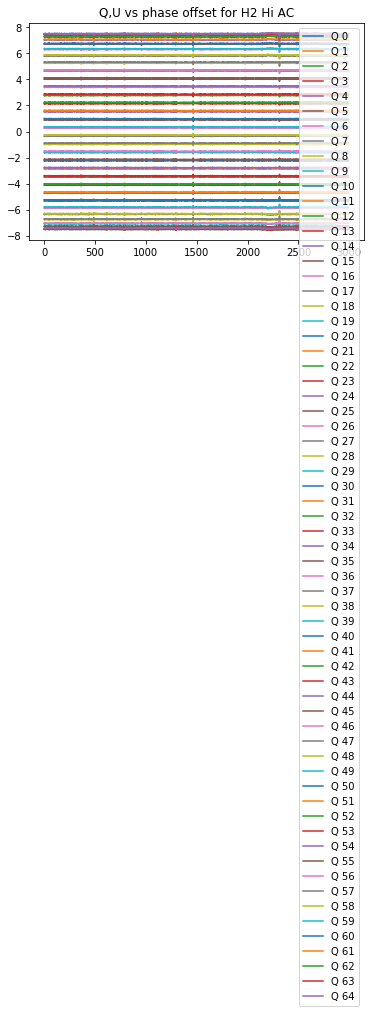

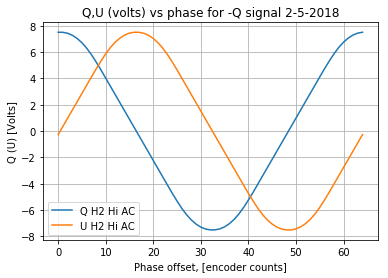

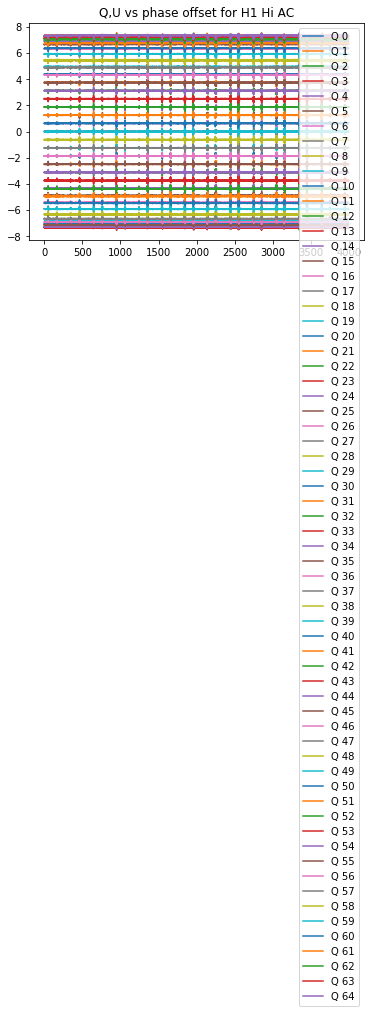

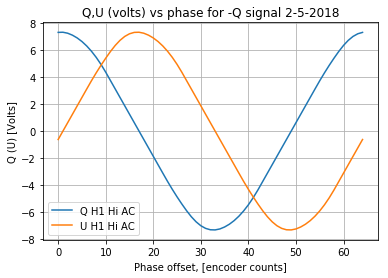

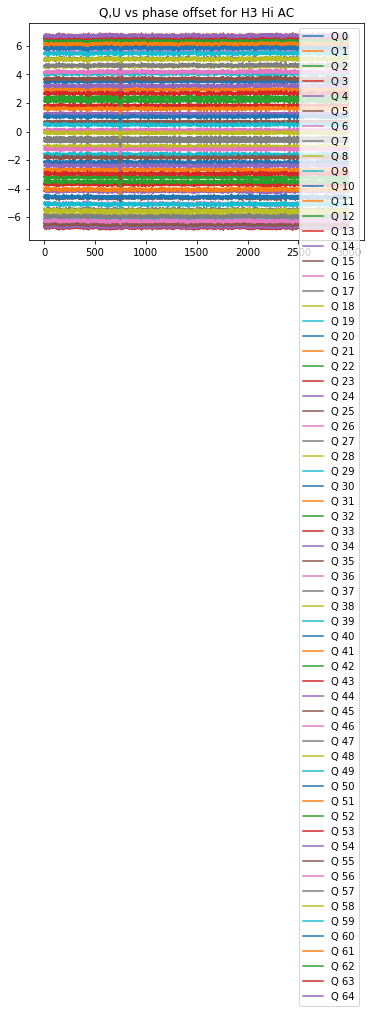

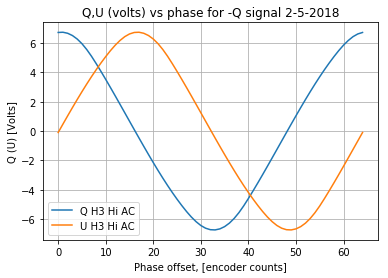

In [14]:
qvsphase_h2=vary_phase(chan='ch4',file_list=h2_files)

qvsphase_h1=vary_phase(chan='ch0',file_list=h1_cal_files)

qvsphase_h3=vary_phase(chan='ch8',file_list=h3_files)

In [15]:
h2data=rt.get_demodulated_data_from_list(filelist=h2_files)

1001
16


1000
16


1000
16


In [16]:
h2data_cal=rt.get_demodulated_data_from_list(filelist=h2_cal_files)

1001
16


1000
16


1000
16


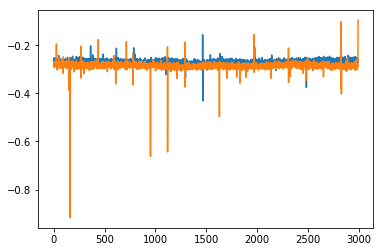

In [17]:
figure()
plot(h2data['ch4']['U'],label='H2 no calibrator')
plot(h2data_cal['ch4']['U'],label='H2 thru calibrator')
legend()